In [122]:
# lets start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [123]:
data.describe()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
# Replace '?' with NaN and drop rows with NaN values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

In [9]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


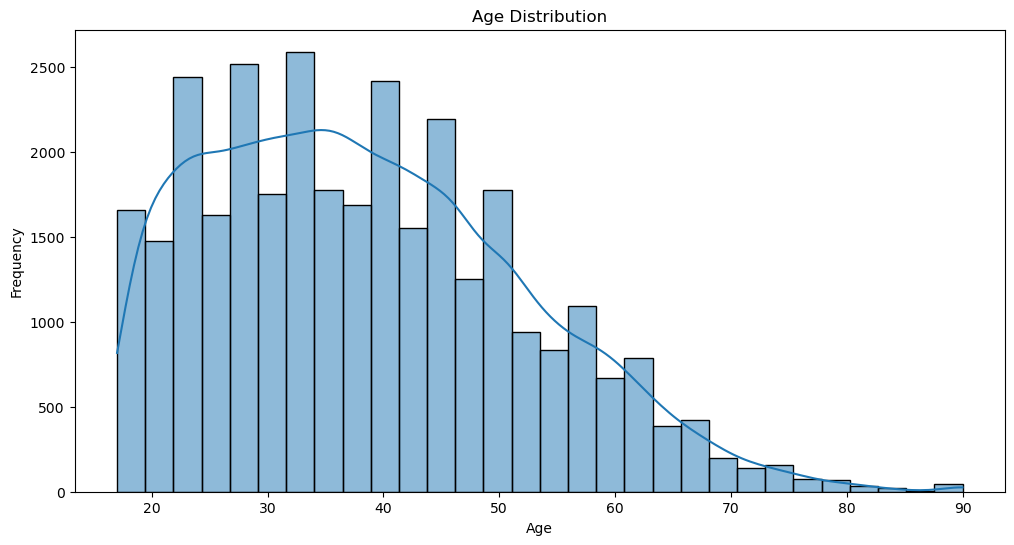

In [14]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

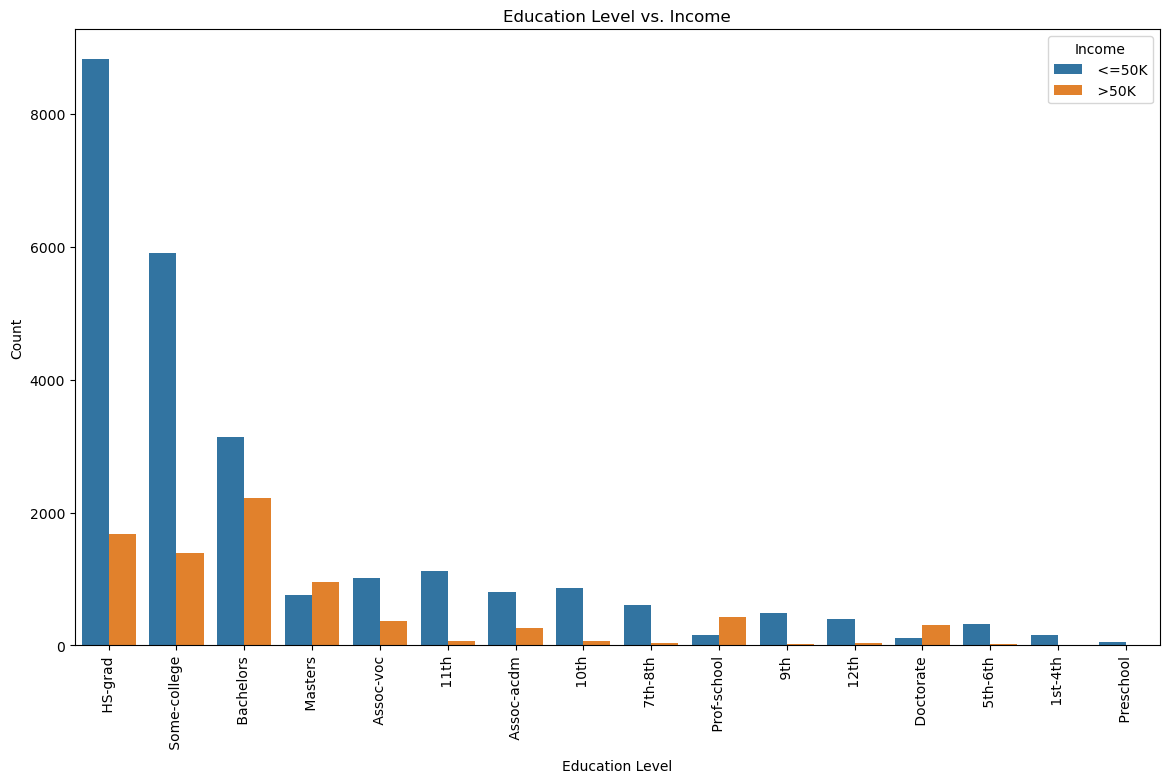

In [22]:
# Education level vs. Income
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Education', hue='Income', order=data['Education'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Education Level vs. Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [30]:
# Encode binary categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Income'] = label_encoder.fit_transform(data['Income'])

In [32]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [36]:
# List of categorical columns based on the actual column names
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country']

In [42]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [46]:
# Verify the encoding result
data_encoded.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
# Ensure all columns names are in lowercase to match with our list
data.columns = [col.lower() for col in data.columns]

In [73]:
# Separate features and target
X = data_encoded.drop('Income', axis=1)
y = data_encoded['Income'].apply(lambda x: 1 if x == '>50K' else 0)

In [75]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
X_train_scaled
X_test_scaled

array([[-0.03893401,  4.63419245, -0.41609204, ...,  0.34058284,
        -0.04447789, -0.02295164],
       [ 0.47256863, -1.31307823, -0.41609204, ...,  0.34058284,
        -0.04447789, -0.02295164],
       [-0.69658026, -0.03508495,  1.1455678 , ...,  0.34058284,
        -0.04447789, -0.02295164],
       ...,
       [ 0.1802814 , -0.42346589, -0.41609204, ...,  0.34058284,
        -0.04447789, -0.02295164],
       [-1.06193929,  2.38571898, -0.41609204, ...,  0.34058284,
        -0.04447789, -0.02295164],
       [ 0.61871224,  0.31839552, -0.41609204, ..., -2.93614324,
        -0.04447789, -0.02295164]])

In [93]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

In [102]:
# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[9768]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9768

    accuracy                           1.00      9768
   macro avg       1.00      1.00      1.00      9768
weighted avg       1.00      1.00      1.00      9768



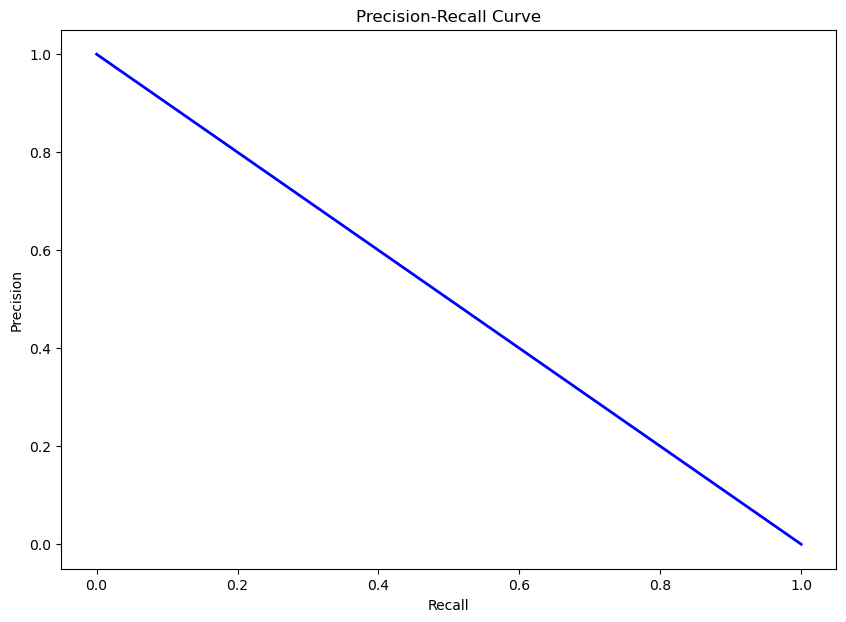

In [121]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()